In [1]:
import csv
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv
from itertools import combinations

In [2]:
#line regression
lr = 0.003
lr2 = 0.000009

In [3]:
# label's file
label_before_split = []
with open('/Users/weichilee/Desktop/dataset/data_T.csv', newline='') as csvfile:
    rows = csv.reader(csvfile)
  # 以迴圈輸出每一列
    for row in rows:
        label_before_split.append(row)
    #print(len(label_before_split))
    #print(label_before_split)

In [4]:
#training data
train_before_split = []
with open('/Users/weichilee/Desktop/dataset/data_X.csv', newline='') as csvfile:
    rows = csv.reader(csvfile)
  # 以迴圈輸出每一列
    for row in rows:
        train_before_split.append(row)
    #print(train_before_split)

In [5]:
#資料前處理
t_label = []
t_data = []
x_label = [] #train data label
y_label = [] #test data label

label_before_split = label_before_split[1:502]
train_before_split = train_before_split[1:502]

#分開編號跟資料:t_label t_data
for i in range(0,len(label_before_split)):
    t_label.append(label_before_split[i][1])

for i in range(0,len(train_before_split)):
    t_data.append(train_before_split[i][1:8])
train_label = t_label[0:400]
test_label = t_label[400:500]
for i in train_label:
    x_label.append(float(i))
for i in test_label:
    y_label.append(float(i))
x_label = np.array(x_label)
y_label = np.array(y_label)

In [6]:
#分類成績與切割train test
x1_train = []
x2_train  = []
x3_train = []
x4_train = []
x5_train = []
x6_train = []
x7_train = []
x1_test = []
x2_test = []
x3_test = []
x4_test = []
x5_test = []
x6_test = []
x7_test = []
for i in range(0,400):
    x1_train.append(float(t_data[i][0]))
    x2_train.append(float(t_data[i][1]))
    x3_train.append(float(t_data[i][2]))
    x4_train.append(float(t_data[i][3]))
    x5_train.append(float(t_data[i][4]))
    x6_train.append(float(t_data[i][5]))
    x7_train.append(float(t_data[i][6]))
for i in range(400,500):
    x1_test.append(float(t_data[i][0]))
    x2_test.append(float(t_data[i][1]))
    x3_test.append(float(t_data[i][2]))
    x4_test.append(float(t_data[i][3]))
    x5_test.append(float(t_data[i][4]))
    x6_test.append(float(t_data[i][5]))
    x7_test.append(float(t_data[i][6]))
#print(len(x7_test))

ax1_train = np.array(x1_train)
ax2_train = np.array(x2_train)
ax3_train = np.array(x3_train)
ax4_train = np.array(x4_train)
ax5_train = np.array(x5_train)
ax6_train = np.array(x6_train)
ax7_train = np.array(x7_train)
ax1_test = np.array(x1_test)
ax2_test = np.array(x2_test)
ax3_test = np.array(x3_test)
ax4_test = np.array(x4_test)
ax5_test = np.array(x5_test)
ax6_test = np.array(x6_test)
ax7_test = np.array(x7_test)
#np.array(x1_train).astype(np.float)
#print(ax1_train[1])

In [7]:
#標準化資料
n_x1_train = []
n_x2_train  = []
n_x3_train = []
n_x4_train = []
n_x5_train = []
n_x6_train = []
n_x7_train = []
n_x1_test = []
n_x2_test = []
n_x3_test = []
n_x4_test = []
n_x5_test = []
n_x6_test = []
n_x7_test = []
nx_label = []
ny_label = []
#print((ax7_train[i])-(np.mean(ax7_train))/(np.std(ax7_train,ddof = 1)))
for i in range(0,400):
    a1 = (ax1_train[i]-ax1_train.min())/(ax1_train.max()-ax1_train.min())
    #a1 = (ax1_train[i])-(np.mean(ax1_train))/(np.std(ax1_train,ddof = 1))
    a2 = (ax2_train[i]-ax2_train.min())/(ax2_train.max()-ax2_train.min())
    #a2 = (ax2_train[i])-(np.mean(ax2_train))/(np.std(ax2_train,ddof = 1))
    a3 = (ax3_train[i]-ax3_train.min())/(ax3_train.max()-ax3_train.min())
    #a3 = (ax3_train[i])-(np.mean(ax3_train))/(np.std(ax3_train,ddof = 1))
    a4 = (ax4_train[i]-ax4_train.min())/(ax4_train.max()-ax4_train.min())
    #a4 = (ax4_train[i])-(np.mean(ax4_train))/(np.std(ax4_train,ddof = 1))
    a5 = (ax5_train[i]-ax5_train.min())/(ax5_train.max()-ax5_train.min())
    #a5 = (ax5_train[i])-(np.mean(ax5_train))/(np.std(ax5_train,ddof = 1))
    a6 = (ax6_train[i]-ax6_train.min())/(ax6_train.max()-ax6_train.min())
    #a6 = (ax6_train[i])-(np.mean(ax6_train))/(np.std(ax6_train,ddof = 1))
    a7 = (ax7_train[i]-ax7_train.min())/(ax7_train.max()-ax7_train.min())
    #a7 = (ax7_train[i])-(np.mean(ax7_train))/(np.std(ax7_train,ddof = 1))
    #print(a7)
    label1 = (x_label[i])-(np.mean(x_label))/(np.std(x_label,ddof = 1))
    n_x1_train.append(float(a1))
    n_x2_train.append(float(a2))
    n_x3_train.append(float(a3))
    n_x4_train.append(float(a4))
    n_x5_train.append(float(a5))
    n_x6_train.append(float(a6))
    n_x7_train.append(float(a7))
    nx_label.append(float(label1))

for i in range(0,100):
    b1 = (ax1_test[i]-ax1_test.min())/(ax1_test.max()-ax1_test.min())
    #b1 = (ax1_test[i])-(np.mean(ax1_test))/(np.std(ax1_test,ddof = 1))
    b2 = (ax2_test[i]-ax2_test.min())/(ax2_test.max()-ax2_test.min())
    #b2 = (ax2_test[i])-(np.mean(ax2_test))/(np.std(ax2_test,ddof = 1))
    b3 = (ax3_test[i]-ax3_test.min())/(ax3_test.max()-ax3_test.min())
    #b3 = (ax3_test[i])-(np.mean(ax3_test))/(np.std(ax3_test,ddof = 1))
    b4 = (ax4_test[i]-ax4_test.min())/(ax4_test.max()-ax4_test.min())
    #b4 = (ax4_test[i])-(np.mean(ax4_test))/(np.std(ax4_test,ddof = 1))
    b5 = (ax5_test[i]-ax5_test.min())/(ax5_test.max()-ax5_test.min())
    #b5 = (ax5_test[i])-(np.mean(ax5_test))/(np.std(ax5_test,ddof = 1))
    b6 = (ax6_test[i]-ax6_test.min())/(ax6_test.max()-ax6_test.min())
    #b6 = (ax6_test[i])-(np.mean(ax6_test))/(np.std(ax6_test,ddof = 1))
    b7 = (ax7_test[i]-ax7_test.min())/(ax7_test.max()-ax7_test.min())
    #b7 = (ax7_test[i])-(np.mean(ax7_test))/(np.std(ax7_test,ddof = 1))
    label2 = (y_label[i])-(np.mean(y_label))/(np.std(y_label,ddof = 1))
    n_x1_test.append(float(b1))
    n_x2_test.append(float(b2))
    n_x3_test.append(float(b3))
    n_x4_test.append(float(b4))
    n_x5_test.append(float(b5))
    n_x6_test.append(float(b6))
    n_x7_test.append(float(b7))
    ny_label.append(float(label2))

In [8]:
#2-1-a
#random 產生 weight
#M = 1
# y = w0 + w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + w7x7
in_w_train = []    #初始weight
N1 = 400
N2 = 100
for i in range(0,8):
    in_w_train.append((random.random()))
#print(in_w_train)
train_func = []

for i in range(0,N1):
    train_func.append((in_w_train[0] + n_x1_train[i]*in_w_train[1] + n_x2_train[i]*in_w_train[2] + n_x3_train[i]*in_w_train[3] + n_x4_train[i]*in_w_train[4] + n_x5_train[i]*in_w_train[5] + n_x6_train[i]*in_w_train[6] +n_x7_train[i]*in_w_train[7]))

In [9]:
#微分weight
#update weight : weight -= d(weight)*lr
r_w_train = [] #result weight
temp_diff_train_label = []
r_w_train0 = in_w_train[0]
r_w_train1 = in_w_train[1] 
r_w_train2 = in_w_train[2] 
r_w_train3 = in_w_train[3] 
r_w_train4 = in_w_train[4] 
r_w_train5 = in_w_train[5]
r_w_train6 = in_w_train[6] 
r_w_train7 = in_w_train[7] 

for i in range(0,N1):
    a = (train_func[i]-nx_label[i])/8
    temp_diff_train_label.append(float(a))

temp_diff_train_label = np.array(temp_diff_train_label)
sum_train_func = temp_diff_train_label.sum()

for i in range(0,N1):
    d_w0_train = float((1/N1)*(sum_train_func)*1)
    d_w1_train = float((1/N1)*(sum_train_func)*n_x1_train[i])
    d_w2_train = float((1/N1)*(sum_train_func)*n_x2_train[i])
    d_w3_train = float((1/N1)*(sum_train_func)*n_x3_train[i])
    d_w4_train = float((1/N1)*(sum_train_func)*n_x4_train[i])
    d_w5_train = float((1/N1)*(sum_train_func)*n_x5_train[i])
    d_w6_train = float((1/N1)*(sum_train_func)*n_x6_train[i])
    d_w7_train = float((1/N1)*(sum_train_func)*n_x7_train[i])
    r_w_train0 -= (d_w0_train*lr)
    r_w_train1 -= (d_w1_train*lr)
    r_w_train2 -= (d_w2_train*lr)
    r_w_train3 -= (d_w3_train*lr)
    r_w_train4 -= (d_w4_train*lr)
    r_w_train5 -= (d_w5_train*lr)
    r_w_train6 -= (d_w6_train*lr)
    r_w_train7 -= (d_w7_train*lr)
    #print(r_w_train1)
#r_w_train0 = in_w_train[0] + r_w_train0

r_w_train.append(r_w_train0)
r_w_train.append(r_w_train1)
r_w_train.append(r_w_train2)
r_w_train.append(r_w_train3)
r_w_train.append(r_w_train4)
r_w_train.append(r_w_train5)
r_w_train.append(r_w_train6)
r_w_train.append(r_w_train7)  
#print(r_w_train)
print('M=1時,使用gradient descent 更新完的權重w0~w7: ',r_w_train)

M=1時,使用gradient descent 更新完的權重w0~w7:  [-0.12171110841614773, -0.2651761200044211, -0.17454145314546612, -0.17821012678928955, -0.5781515623693282, 0.048558265379506714, -0.2615866998580967, 0.15513792837742563]


In [10]:
#帶回update weight 算y 跟 label 的 rms
temp_sq_train =[]
for i in range(0,N1):
    y1=r_w_train[0] + r_w_train[1]*n_x1_train[i] +r_w_train[2]*n_x2_train[i] + r_w_train[3]*n_x3_train[i] + r_w_train[4]*n_x4_train[i] + r_w_train[5]*n_x5_train[i] + r_w_train[6]*n_x6_train[i]+r_w_train[7]+n_x7_train[i]
    diff = (y1 - x_label[i])/8
    #print(diff)
    temp_sq_train.append(diff**2)
temp_sq_train = np.array(temp_sq_train)
#print(temp_sq_train)
train_mean = (temp_sq_train.sum()*1/N1)
#print(train_mean)
rms_train = math.sqrt(train_mean)
print('M=1時的training rms: ',rms_train)

M=1時的training rms:  0.12963254655207274


In [11]:
temp_sq_test =[]

for i in range(0,N2):
    y2=r_w_train[0] + r_w_train[1]*n_x1_test[i] +r_w_train[2]*n_x2_test[i] + r_w_train[3]*n_x3_test[i] + r_w_train[4]*n_x4_test[i] + r_w_train[5]*n_x5_test[i] + r_w_train[6]*n_x6_test[i]+r_w_train[7]+n_x7_test[i]
    diff = (y2 - y_label[i])/8
    temp_sq_test.append(diff**2)
temp_sq_test = np.array(temp_sq_test)
test_mean = (temp_sq_test.sum()*(1/N2))
rms_test = math.sqrt(test_mean)
print('M=1時的testing rms: ',rms_test)

M=1時的testing rms:  0.11191512071560825


In [12]:
#M = 2
#random 產生 weight
in_w_train2 = []    #初始weight
in_w_train3 = []
x_ij = []
name_xij = []
name_xij_test = []
r_xij = [] #training data 後49個x 內積的組合
r_xij_test = []
N1 = 400
N2 = 100
for i in range(0,8):
    in_w_train2.append((random.random()))
for i in range(0,49):
    in_w_train3.append((random.random()))
#print(len(in_w_train2)+len(in_w_train3))
train_func2 = []
train_func3 = []
#
for i in range(0,N1):
    y1 = in_w_train2[0] + n_x1_train[i]*in_w_train2[1] + n_x2_train[i]*in_w_train2[2] + n_x3_train[i]*in_w_train2[3] + n_x4_train[i]*in_w_train2[4] + n_x5_train[i]*in_w_train2[5] + n_x6_train[i]*in_w_train2[6] +n_x7_train[i]*in_w_train2[7]
    train_func2.append(y1)
    
for i in range(1,8):
    for j in range(1,8):
        x_ij.append(str(i)+str(j))
#print(x_ij[0][1])
x_ij = str(x_ij)
#print(x_ij)

#先用成兩個1d matrixs 再內積

for i in range(0,len(x_ij)):
    if x_ij[i] == '1':
        name_xij.append(n_x1_train)
        name_xij_test.append(n_x1_test)
        continue
    elif x_ij[i] == '2':
        name_xij.append(n_x2_train)
        name_xij_test.append(n_x2_test)
        continue
    elif x_ij[i] == '3':
        name_xij.append(n_x3_train)
        name_xij_test.append(n_x3_test)
        continue
    elif x_ij[i] == '4':
        name_xij.append(n_x4_train)
        name_xij_test.append(n_x4_test)
        continue
    elif x_ij[i] == '5':
        name_xij.append(n_x5_train)
        name_xij_test.append(n_x5_test)
        continue
    elif x_ij[i] == '6':
        name_xij.append(n_x6_train)
        name_xij_test.append(n_x6_test)
        continue
    elif x_ij[i] == '7':
        name_xij.append(n_x7_train)
        name_xij_test.append(n_x7_test)
        continue
    else:
        continue
#print((name_xij))
#兩兩元素抓出來        
step = 2
name_xij = [name_xij[i:i+step] for i in range(0, len(name_xij), step)]
#print(len(name_xij[0][0]))
name_xij = np.array(name_xij)
#print(name_xij)

name_xij_test = [name_xij_test[i:i+step] for i in range(0, len(name_xij_test), step)]
#print(len(name_xij[0][0]))
name_xij_test = np.array(name_xij_test)


#training x sets
for i in range(0,len(name_xij)):
    r_xij.append(name_xij[i][0]*name_xij[i][1])
    train_func3.append(in_w_train3[i]*name_xij[i][0]*name_xij[i][1])


#testing x sets
for i in range(0,len(name_xij_test)):
    r_xij_test.append(name_xij_test[i][0]*name_xij_test[i][1])

r_xij_test = np.array(r_xij_test)

#print(r_xij)
train_func3 = np.array(train_func3)
train_func2 = np.array(train_func2)
train_y = train_func3.sum() + train_func2.sum()     
#print(train_y)
x_label_m2 = x_label
x_label_m2 = np.array(x_label_m2)
y_label_m2 = y_label
y_label_m2 = np.array(y_label_m2)
diff_m2 = (train_y - x_label_m2.sum())/57
#print(diff_m2)

In [13]:
#update 57 weights
r_w_train_m2 = [] #更新完的57個weights
r_w_train0_m2 = in_w_train2[0]
r_w_train1_m2 = in_w_train2[1]
r_w_train2_m2 = in_w_train2[2]
r_w_train3_m2 = in_w_train2[3]
r_w_train4_m2 = in_w_train2[4]
r_w_train5_m2 = in_w_train2[5]
r_w_train6_m2 = in_w_train2[6]
r_w_train7_m2 = in_w_train2[7]
temp_w49 = []
update_w_m2 = []
sum_r_xij = []
sum_r_xij_test = []
for i in range(0,N1):
    d_w0_train_m2 = float((1/N1)*(diff_m2)*1)
    d_w1_train_m2 = float((1/N1)*(diff_m2)*n_x1_train[i])
    d_w2_train_m2 = float((1/N1)*(diff_m2)*n_x2_train[i])
    d_w3_train_m2 = float((1/N1)*(diff_m2)*n_x3_train[i])
    d_w4_train_m2 = float((1/N1)*(diff_m2)*n_x4_train[i])
    d_w5_train_m2 = float((1/N1)*(diff_m2)*n_x5_train[i])
    d_w6_train_m2 = float((1/N1)*(diff_m2)*n_x6_train[i])
    d_w7_train_m2 = float((1/N1)*(diff_m2)*n_x7_train[i])
    r_w_train0_m2 -= (d_w0_train_m2*lr)
    r_w_train1_m2 -= (d_w1_train_m2*lr)
    r_w_train2_m2 -= (d_w2_train_m2*lr)
    r_w_train3_m2 -= (d_w3_train_m2*lr)
    r_w_train4_m2 -= (d_w4_train_m2*lr)
    r_w_train5_m2 -= (d_w5_train_m2*lr)
    r_w_train6_m2 -= (d_w6_train_m2*lr)
    r_w_train7_m2 -= (d_w7_train_m2*lr)
r_w_train_m2.append(r_w_train0_m2)
r_w_train_m2.append(r_w_train1_m2)
r_w_train_m2.append(r_w_train2_m2)
r_w_train_m2.append(r_w_train3_m2)
r_w_train_m2.append(r_w_train4_m2)
r_w_train_m2.append(r_w_train5_m2)
r_w_train_m2.append(r_w_train6_m2)
r_w_train_m2.append(r_w_train7_m2)
#weights 8~56
for i in in_w_train3:
    temp_w49.append(i)
temp_w49 = np.array(temp_w49)

for i in range(0,len(r_xij)):
    sum_r_xij.append(r_xij[i].sum())
#print(len(sum_r_xij))
for j in range(0,len(temp_w49)):
    a = -((1/N1)*(diff_m2)*sum_r_xij[j])*lr2
    update_w_m2.append(a)
    
for i in range(0,len(r_xij_test)):
    sum_r_xij_test.append(r_xij_test[i].sum())    
    
update_w_m2 = np.array(update_w_m2)
in_w_train3 = np.array(in_w_train3)
temp_r_w = update_w_m2 + in_w_train3
#print(len(temp_r_w))
for i in temp_r_w:
    r_w_train_m2.append(i)
#print(len(r_w_train_m2[8:57]))

In [14]:
#train rms
train_func_m2_1 = [] #存diff
r_w_train_m2 = np.array(r_w_train_m2)
sum_r_xij = np.array(sum_r_xij)
sum_r_xij = sum_r_xij.flatten()
r_w_train_m2_49 = r_w_train_m2[8:57]
for i in range(0,N1):
    train_func_m2_2 = []
    y1 = in_w_train2[0] + n_x1_train[i]*r_w_train_m2[1] + n_x2_train[i]*r_w_train_m2[2] + n_x3_train[i]*r_w_train_m2[3] + n_x4_train[i]*r_w_train_m2[4] + n_x5_train[i]*r_w_train_m2[5] + n_x6_train[i]*r_w_train_m2[6] +n_x7_train[i]*r_w_train_m2[7]
    for j in range(0,len(r_xij)):
        train_func_m2_2.append(r_xij[j][i]*r_w_train_m2_49[j])
    train_func_m2_2 = np.array(train_func_m2_2)
    diff_sq = ((y1+train_func_m2_2.sum()-x_label[i])/57)**2
    train_func_m2_1.append(diff_sq)
#print(len(train_func_m2_1))
train_func_m2_1 = np.array(train_func_m2_1)
r_m2 = train_func_m2_1.sum()
rms_train_m2 = math.sqrt((1/N1)*r_m2)
print('M=2時的training rms: ',rms_train_m2)

M=2時的training rms:  0.21496236685555634


In [15]:
#test rms
test_func_m2_1 = []
for i in range(0,N2):
    test_func_m2_2 = []
    y1 = in_w_train2[0] + n_x1_test[i]*r_w_train_m2[1] + n_x2_test[i]*r_w_train_m2[2] + n_x3_test[i]*r_w_train_m2[3] + n_x4_test[i]*r_w_train_m2[4] + n_x5_test[i]*r_w_train_m2[5] + n_x6_test[i]*r_w_train_m2[6] +n_x7_test[i]*r_w_train_m2[7]
    for j in range(0,len(r_xij_test)):
        test_func_m2_2.append(r_xij_test[j][i]*r_w_train_m2_49[j])
    test_func_m2_2 = np.array(test_func_m2_2)
    diff_sq = ((y1+test_func_m2_2.sum()-y_label[i])/57)**2
    test_func_m2_1.append(diff_sq)
test_func_m2_1 = np.array(test_func_m2_1)
r_m2_2= test_func_m2_1.sum()
rms_test_m2 = math.sqrt((1/N2)*r_m2_2)
print('M=2時的testing rms: ',rms_test_m2)

M=2時的testing rms:  0.19558333077640513


In [16]:
####################################################################

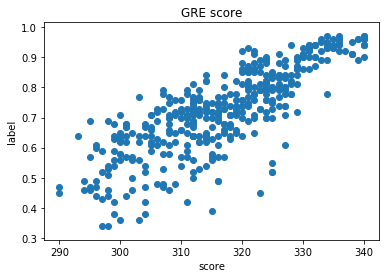

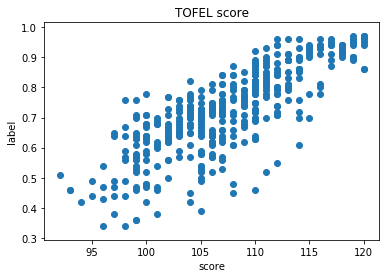

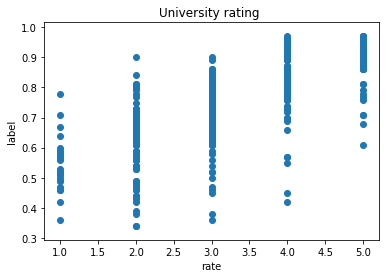

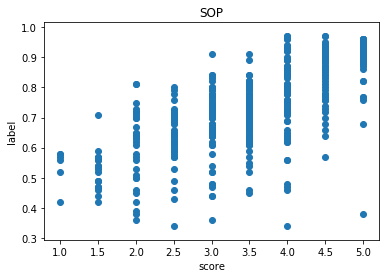

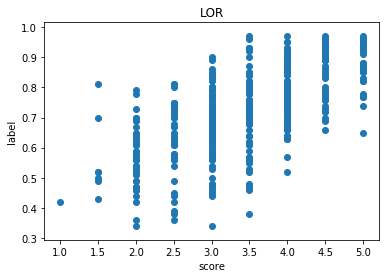

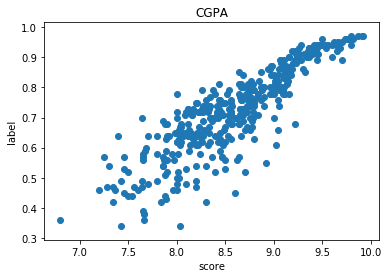

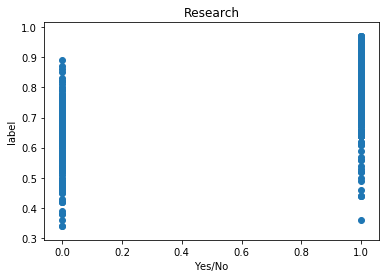

In [17]:
#2-2
#print(x1_train)
t_label = np.array(t_label)
x1_train = np.array(x1_train)
#print(t_label)
plt.title('GRE score')
plt.xlabel('score')
plt.ylabel('label')
plt.scatter(ax1_train,x_label)
plt.show()


plt.title('TOFEL score')
plt.xlabel('score')
plt.ylabel('label')
plt.scatter(ax2_train,x_label)
plt.show()

plt.title('University rating ')
plt.xlabel('rate')
plt.ylabel('label')
plt.scatter(ax3_train,x_label)
plt.show()

plt.title('SOP')
plt.xlabel('score')
plt.ylabel('label')
plt.scatter(ax4_train,x_label)
plt.show()

plt.title('LOR')
plt.xlabel('score')
plt.ylabel('label')
plt.scatter(ax5_train,x_label)
plt.show()

plt.title('CGPA')
plt.xlabel('score')
plt.ylabel('label')
plt.scatter(ax6_train,x_label)
plt.show()

plt.title('Research')
plt.xlabel('Yes/No')
plt.ylabel('label')
plt.scatter(ax7_train,x_label)
plt.show()

In [39]:
#basis function : polynomial
#{x1,x2,x3,x4,x5,x6,x7,x1x1,x1x2,x1x3,x1x4,x1x5,x1x6,x1x7,x2x2,x2x3,x2x4,x2x5,x2x6,x2x7,x3x3,x3x4,x3x5,x3x6,x3x7,x4x4,x4x5,x4x6,x4x7,x5x5,x5x6,x5x7,x6x6,x6x7,x7x7}
#len = 35
ax_train = []
ax_test = []
basis_train = []
basis_test = []
temp_check = []
temp_check2 = []
n_x1_train = np.array(n_x1_train)
n_x2_train = np.array(n_x2_train)
n_x3_train = np.array(n_x3_train)
n_x4_train = np.array(n_x4_train)
n_x5_train = np.array(n_x5_train)
n_x6_train = np.array(n_x6_train)
n_x7_train = np.array(n_x7_train)


ax_train.append(n_x1_train)
ax_train.append(n_x2_train)
ax_train.append(n_x3_train)
ax_train.append(n_x4_train)
ax_train.append(n_x5_train)
ax_train.append(n_x6_train)
ax_train.append(n_x7_train)
ax_train = np.array(ax_train)




for i in range(0,7):
    basis_train.append(ax_train[i])
for i in range(0,7):
    basis_train.append(ax_train[i]*ax_train[i])
for i in range(0,7):
    for j in range(0,7):
        if i != j:
            if str(i)+str(j) not in temp_check and str(j)+str(i) not in temp_check:
                temp_check.append(str(i)+str(j))
                basis_train.append(ax_train[i]*ax_train[j])      
#print(len(basis_train))

n_x1_test = np.array(n_x1_test)
n_x2_test = np.array(n_x2_test)
n_x3_test = np.array(n_x3_test)
n_x4_test = np.array(n_x4_test)
n_x5_test = np.array(n_x5_test)
n_x6_test = np.array(n_x6_test)
n_x7_test = np.array(n_x7_test)
ax_test.append(n_x1_test)
ax_test.append(n_x2_test)
ax_test.append(n_x3_test)
ax_test.append(n_x4_test)
ax_test.append(n_x5_test)
ax_test.append(n_x6_test)
ax_test.append(n_x7_test)
ax_test = np.array(ax_test)

for i in range(0,7):
    basis_test.append(ax_test[i])
for i in range(0,7):
    basis_test.append(ax_test[i]*ax_test[i])
for i in range(0,7):
    for j in range(0,7):
        if i != j:
            if str(i)+str(j) not in temp_check2 and str(j)+str(i) not in temp_check2:
                temp_check2.append(str(i)+str(j))
                basis_test.append(ax_test[i]*ax_test[j])  
#print(len(basis_test))


basis_train = np.array(basis_train)
basis_test = np.array(basis_test)
#print(basis_train)

In [40]:
#最小平方法更新weights: weight = (basis_train.T*basis_train)^-1*(basis_train.T)*x_label
a = np.dot(basis_train,basis_train.T)
#print(len(a[0]))
b_train_inv = pinv(a)
#print(b_train_inv)
b = np.dot(basis_train.T,b_train_inv)
#print(b)
update_w = np.dot(x_label,b)
print('polynomial的weights更新： ',(update_w))

polynomial的weights更新：  [ 0.08123537  0.25834332 -0.44142057  0.05565441  0.62656654  1.2559519
 -0.04646814  0.45211059  0.18091026 -0.07994103  0.00463264  0.11317365
  0.31550796 -0.04646814 -0.44252655 -0.03123792  0.09954562  0.2315786
 -0.72060807 -0.04869935  0.13837092  0.25629    -0.22359038 -0.41696182
  0.09079221  0.1246355   0.42886407  0.29961405 -0.05388035 -0.39274255
 -0.23045665  0.08550544 -1.12011497 -0.01219686  0.12837606]


In [42]:
#使用M=1的y = w0 + w1x1 + ... +w7x7+w8x1x1+w9x2x2+...+w36x7x7
#算出training rms
train_func_m1_1 = [] #存diff
update_w28 = update_w[7:35]
basis_train28 = basis_train[7:35]
for i in range(0,N1):
    train_func_m1_2 = [] #暫存組合項
    y1 = random.random() + n_x1_train[i]*update_w[0]+ n_x2_train[i]*update_w[1]+n_x3_train[i]*update_w[2]+n_x4_train[i]*update_w[3]+n_x5_train[i]*update_w[4]+n_x6_train[i]*update_w[5]+n_x7_train[i]*update_w[6]
    for j in range(0,len(update_w28)):
        train_func_m1_2.append(basis_train28[j][i]*update_w28[j])
    train_func_m1_2 = np.array(train_func_m1_2)
    diff_sq = ((y1+train_func_m1_2.sum()-x_label[i])/36)**2
    train_func_m1_1.append(diff_sq)    
train_func_m1_1 = np.array(train_func_m1_1)
r_m1_poly = train_func_m1_1.sum()
rms_poly_train_m1 = math.sqrt((1/N1)*r_m1_poly)
print('使用poly為basis時,regression M=1時的training rms: ',rms_poly_train_m1)      
    

使用poly為basis時,regression M=1時的training rms:  0.015835573572921993


In [43]:
#testing rms
test_func_m1_1 = [] #存diff
basis_test28 = basis_test[7:35]
for i in range(0,N2):
    test_func_m1_2 = [] #暫存組合項
    y1 = random.random() + n_x1_test[i]*update_w[0]+ n_x2_test[i]*update_w[1]+n_x3_test[i]*update_w[2]+n_x4_test[i]*update_w[3]+n_x5_test[i]*update_w[4]+n_x6_test[i]*update_w[5]+n_x7_test[i]*update_w[6]
    for j in range(0,len(update_w28)):
        test_func_m1_2.append(basis_test28[j][i]*update_w28[j])
    test_func_m1_2 = np.array(test_func_m1_2)
    diff_sq = ((y1+test_func_m1_2.sum()-y_label[i])/36)**2
    test_func_m1_1.append(diff_sq)    
test_func_m1_1 = np.array(test_func_m1_1)
r_m1_poly_test = test_func_m1_1.sum()
rms_poly_test_m1 = math.sqrt((1/N2)*r_m1_poly_test)
print('使用poly為basis時,regression M=1時的testing rms: ',rms_poly_test_m1)  

使用poly為basis時,regression M=1時的testing rms:  0.01512598692930239


In [52]:
#N-fold cross-validation
#1
#test = 0~100
#資料前處理
x_label_1 = [] #train data label
y_label_1 = [] #test data label
#分開編號跟資料:t_label t_data

train_label_1 = t_label[100:500]
test_label_1 = t_label[0:100]
for i in train_label_1:
    x_label_1.append(float(i))
for i in test_label_1:
    y_label_1.append(float(i))
x_label_1 = np.array(x_label_1)
y_label_1 = np.array(y_label_1)

#分類成績與切割train test
x1_train1 = []
x2_train1 = []
x3_train1 = []
x4_train1 = []
x5_train1 = []
x6_train1 = []
x7_train1 = []
x1_test1 = []
x2_test1 = []
x3_test1 = []
x4_test1 = []
x5_test1 = []
x6_test1 = []
x7_test1 = []
for i in range(100,500):
    x1_train1.append(float(t_data[i][0]))
    x2_train1.append(float(t_data[i][1]))
    x3_train1.append(float(t_data[i][2]))
    x4_train1.append(float(t_data[i][3]))
    x5_train1.append(float(t_data[i][4]))
    x6_train1.append(float(t_data[i][5]))
    x7_train1.append(float(t_data[i][6]))
for i in range(0,100):
    x1_test1.append(float(t_data[i][0]))
    x2_test1.append(float(t_data[i][1]))
    x3_test1.append(float(t_data[i][2]))
    x4_test1.append(float(t_data[i][3]))
    x5_test1.append(float(t_data[i][4]))
    x6_test1.append(float(t_data[i][5]))
    x7_test1.append(float(t_data[i][6]))
ax1_train1 = np.array(x1_train1)
ax2_train1 = np.array(x2_train1)
ax3_train1 = np.array(x3_train1)
ax4_train1 = np.array(x4_train1)
ax5_train1 = np.array(x5_train1)
ax6_train1 = np.array(x6_train1)
ax7_train1 = np.array(x7_train1)
ax1_test1= np.array(x1_test1)
ax2_test1 = np.array(x2_test1)
ax3_test1 = np.array(x3_test1)
ax4_test1 = np.array(x4_test1)
ax5_test1 = np.array(x5_test1)
ax6_test1 = np.array(x6_test1)
ax7_test1 = np.array(x7_test1)

#標準化資料
n_x1_train1 = []
n_x2_train1  = []
n_x3_train1 = []
n_x4_train1 = []
n_x5_train1 = []
n_x6_train1 = []
n_x7_train1 = []
n_x1_test1= []
n_x2_test1 = []
n_x3_test1 = []
n_x4_test1 = []
n_x5_test1 = []
n_x6_test1 = []
n_x7_test1 = []
for i in range(0,400):
    a1 = (ax1_train1[i]-ax1_train1.min())/(ax1_train1.max()-ax1_train1.min())
    a2 = (ax2_train1[i]-ax2_train1.min())/(ax2_train1.max()-ax2_train1.min())
    a3 = (ax3_train1[i]-ax3_train1.min())/(ax3_train1.max()-ax3_train1.min())
    a4 = (ax4_train1[i]-ax4_train1.min())/(ax4_train1.max()-ax4_train1.min())
    a5 = (ax5_train1[i]-ax5_train1.min())/(ax5_train1.max()-ax5_train1.min())
    a6 = (ax6_train1[i]-ax6_train1.min())/(ax6_train1.max()-ax6_train1.min())
    a7 = (ax7_train1[i]-ax7_train1.min())/(ax7_train1.max()-ax7_train1.min())
    n_x1_train1.append(float(a1))
    n_x2_train1.append(float(a2))
    n_x3_train1.append(float(a3))
    n_x4_train1.append(float(a4))
    n_x5_train1.append(float(a5))
    n_x6_train1.append(float(a6))
    n_x7_train1.append(float(a7))
for i in range(0,100):
    b1 = (ax1_test1[i]-ax1_test1.min())/(ax1_test1.max()-ax1_test1.min())
    b2 = (ax2_test1[i]-ax2_test1.min())/(ax2_test1.max()-ax2_test1.min())
    b3 = (ax3_test1[i]-ax3_test1.min())/(ax3_test1.max()-ax3_test1.min())
    b4 = (ax4_test1[i]-ax4_test1.min())/(ax4_test1.max()-ax4_test1.min())
    b5 = (ax5_test1[i]-ax5_test1.min())/(ax5_test1.max()-ax5_test1.min())
    b6 = (ax6_test1[i]-ax6_test1.min())/(ax6_test1.max()-ax6_test1.min())
    b7 = (ax7_test1[i]-ax7_test1.min())/(ax7_test1.max()-ax7_test1.min())
    n_x1_test1.append(float(b1))
    n_x2_test1.append(float(b2))
    n_x3_test1.append(float(b3))
    n_x4_test1.append(float(b4))
    n_x5_test1.append(float(b5))
    n_x6_test1.append(float(b6))
    n_x7_test1.append(float(b7))
    
#最小平方法求出update weights
ax_train1 = []
ax_test1 = []
n_x1_train1 = np.array(n_x1_train1)
n_x2_train1 = np.array(n_x2_train1)
n_x3_train1 = np.array(n_x3_train1)
n_x4_train1 = np.array(n_x4_train1)
n_x5_train1 = np.array(n_x5_train1)
n_x6_train1 = np.array(n_x6_train1)
n_x7_train1 = np.array(n_x7_train1)


ax_train1.append(n_x1_train1)
ax_train1.append(n_x2_train1)
ax_train1.append(n_x3_train1)
ax_train1.append(n_x4_train1)
ax_train1.append(n_x5_train1)
ax_train1.append(n_x6_train1)
ax_train1.append(n_x7_train1)
ax_train1 = np.array(ax_train1)


a1 = np.dot(ax_train1,ax_train1.T)
a_train_inv1 = pinv(a1)
b1 = np.dot(ax_train1.T,a_train_inv1)
update_w_1 = np.dot(x_label_1,b1)

#使用M=1的y = w0 + w1x1 + ...
#算出training rms
k_train_1 = [] #存diff
for i in range(0,N1):
    y1 = random.random() + n_x1_train1[i]*update_w_1[0]+ n_x2_train1[i]*update_w_1[1]+n_x3_train1[i]*update_w_1[2]+n_x4_train1[i]*update_w_1[3]+n_x5_train1[i]*update_w_1[4]+n_x6_train1[i]*update_w_1[5]+n_x7_train1[i]*update_w_1[6]
    diff_sq = ((y1-x_label_1[i])/8)**2
    k_train_1.append(diff_sq)    
k_train_1 = np.array(k_train_1)
r_m1_k1 = k_train_1.sum()
rms_k_train1 = math.sqrt((1/N1)*r_m1_k1)
print('N-fold_1:M=1時的training rms: ',rms_k_train1) 

#testing rms
k_test_1 = [] #存diff
for i in range(0,N2):
    y1 = random.random() + n_x1_test1[i]*update_w_1[0]+ n_x2_test1[i]*update_w_1[1]+n_x3_test1[i]*update_w_1[2]+n_x4_test1[i]*update_w_1[3]+n_x5_test1[i]*update_w_1[4]+n_x6_test1[i]*update_w_1[5]+n_x7_test1[i]*update_w_1[6]
    diff_sq = ((y1-y_label_1[i])/8)**2
    k_test_1.append(diff_sq)    
k_test_1 = np.array(k_test_1)
r_m1_test_k1 = k_test_1.sum()
rms_k_test1 = math.sqrt((1/N2)*r_m1_test_k1)
print('N-fold_1:M=1時的testing rms: ',rms_k_test1)

N-fold_1:M=1時的training rms:  0.06887425618065372
N-fold_1:M=1時的testing rms:  0.07856129500538307


In [61]:
#2
#test = 100~200
#資料前處理
x_label_2 = [] #train data label
y_label_2 = [] #test data label
#分開編號跟資料:t_label t_data


train_label_2 = list(t_label[0:100])
for i in range(200,500):
    train_label_2.append(t_label[i])
test_label_2 = t_label[100:200]
for i in train_label_2:
    x_label_2.append(float(i))
for i in test_label_2:
    y_label_2.append(float(i))
x_label_2 = np.array(x_label_2)
y_label_2 = np.array(y_label_2)

#分類成績與切割train test
x1_train2 = []
x2_train2 = []
x3_train2 = []
x4_train2 = []
x5_train2 = []
x6_train2 = []
x7_train2 = []
x1_test2 = []
x2_test2 = []
x3_test2 = []
x4_test2 = []
x5_test2 = []
x6_test2 = []
x7_test2 = []
for i in range(0,100):
    x1_train2.append(float(t_data[i][0]))
    x2_train2.append(float(t_data[i][1]))
    x3_train2.append(float(t_data[i][2]))
    x4_train2.append(float(t_data[i][3]))
    x5_train2.append(float(t_data[i][4]))
    x6_train2.append(float(t_data[i][5]))
    x7_train2.append(float(t_data[i][6]))
for i in range(200,500):
    x1_train2.append(float(t_data[i][0]))
    x2_train2.append(float(t_data[i][1]))
    x3_train2.append(float(t_data[i][2]))
    x4_train2.append(float(t_data[i][3]))
    x5_train2.append(float(t_data[i][4]))
    x6_train2.append(float(t_data[i][5]))
    x7_train2.append(float(t_data[i][6]))
for i in range(100,200):
    x1_test2.append(float(t_data[i][0]))
    x2_test2.append(float(t_data[i][1]))
    x3_test2.append(float(t_data[i][2]))
    x4_test2.append(float(t_data[i][3]))
    x5_test2.append(float(t_data[i][4]))
    x6_test2.append(float(t_data[i][5]))
    x7_test2.append(float(t_data[i][6]))
ax1_train2 = np.array(x1_train2)
ax2_train2 = np.array(x2_train2)
ax3_train2 = np.array(x3_train2)
ax4_train2 = np.array(x4_train2)
ax5_train2 = np.array(x5_train2)
ax6_train2 = np.array(x6_train2)
ax7_train2 = np.array(x7_train2)
ax1_test2 = np.array(x1_test2)
ax2_test2 = np.array(x2_test2)
ax3_test2 = np.array(x3_test2)
ax4_test2 = np.array(x4_test2)
ax5_test2 = np.array(x5_test2)
ax6_test2 = np.array(x6_test2)
ax7_test2 = np.array(x7_test2)

#標準化資料
n_x1_train2 = []
n_x2_train2  = []
n_x3_train2 = []
n_x4_train2 = []
n_x5_train2 = []
n_x6_train2 = []
n_x7_train2 = []
n_x1_test2 = []
n_x2_test2 = []
n_x3_test2 = []
n_x4_test2 = []
n_x5_test2 = []
n_x6_test2 = []
n_x7_test2 = []
for i in range(0,400):
    a1 = (ax1_train2[i]-ax1_train2.min())/(ax1_train2.max()-ax1_train2.min())
    a2 = (ax2_train2[i]-ax2_train2.min())/(ax2_train2.max()-ax2_train2.min())
    a3 = (ax3_train2[i]-ax3_train2.min())/(ax3_train2.max()-ax3_train2.min())
    a4 = (ax4_train2[i]-ax4_train2.min())/(ax4_train2.max()-ax4_train2.min())
    a5 = (ax5_train2[i]-ax5_train2.min())/(ax5_train2.max()-ax5_train2.min())
    a6 = (ax6_train2[i]-ax6_train2.min())/(ax6_train2.max()-ax6_train2.min())
    a7 = (ax7_train2[i]-ax7_train2.min())/(ax7_train2.max()-ax7_train2.min())
    n_x1_train2.append(float(a1))
    n_x2_train2.append(float(a2))
    n_x3_train2.append(float(a3))
    n_x4_train2.append(float(a4))
    n_x5_train2.append(float(a5))
    n_x6_train2.append(float(a6))
    n_x7_train2.append(float(a7))
for i in range(0,100):
    b1 = (ax1_test2[i]-ax1_test2.min())/(ax1_test2.max()-ax1_test2.min())
    b2 = (ax2_test2[i]-ax2_test2.min())/(ax2_test2.max()-ax2_test2.min())
    b3 = (ax3_test2[i]-ax3_test2.min())/(ax3_test2.max()-ax3_test2.min())
    b4 = (ax4_test2[i]-ax4_test2.min())/(ax4_test2.max()-ax4_test2.min())
    b5 = (ax5_test2[i]-ax5_test2.min())/(ax5_test2.max()-ax5_test2.min())
    b6 = (ax6_test2[i]-ax6_test2.min())/(ax6_test2.max()-ax6_test2.min())
    b7 = (ax7_test2[i]-ax7_test2.min())/(ax7_test2.max()-ax7_test2.min())
    n_x1_test2.append(float(b1))
    n_x2_test2.append(float(b2))
    n_x3_test2.append(float(b3))
    n_x4_test2.append(float(b4))
    n_x5_test2.append(float(b5))
    n_x6_test2.append(float(b6))
    n_x7_test2.append(float(b7))
    
#最小平方法求出update weights
ax_train2 = []
ax_test2 = []
n_x1_train2 = np.array(n_x1_train2)
n_x2_train2 = np.array(n_x2_train2)
n_x3_train2 = np.array(n_x3_train2)
n_x4_train2 = np.array(n_x4_train2)
n_x5_train2 = np.array(n_x5_train2)
n_x6_train2 = np.array(n_x6_train2)
n_x7_train2 = np.array(n_x7_train2)


ax_train2.append(n_x1_train2)
ax_train2.append(n_x2_train2)
ax_train2.append(n_x3_train2)
ax_train2.append(n_x4_train2)
ax_train2.append(n_x5_train2)
ax_train2.append(n_x6_train2)
ax_train2.append(n_x7_train2)
ax_train2 = np.array(ax_train2)


a2 = np.dot(ax_train2,ax_train2.T)
a_train_inv2 = pinv(a2)
b2 = np.dot(ax_train2.T,a_train_inv2)
update_w_2 = np.dot(x_label_2,b2)

#使用M=1的y = w0 + w1x1 + ...
#算出training rms
k_train_2 = [] #存diff
for i in range(0,N1):
    y1 = random.random() + n_x1_train2[i]*update_w_2[0]+ n_x2_train2[i]*update_w_2[1]+n_x3_train2[i]*update_w_2[2]+n_x4_train2[i]*update_w_2[3]+n_x5_train2[i]*update_w_2[4]+n_x6_train2[i]*update_w_2[5]+n_x7_train2[i]*update_w_2[6]
    diff_sq = ((y1-x_label_2[i])/8)**2
    k_train_2.append(diff_sq)    
k_train_2 = np.array(k_train_2)
r_m1_k2 = k_train_2.sum()
rms_k_train2 = math.sqrt((1/N1)*r_m1_k2)
print('N-fold_2:M=1時的training rms: ',rms_k_train2) 

#testing rms
k_test_2 = [] #存diff
for i in range(0,N2):
    y1 = random.random() + n_x1_test2[i]*update_w_2[0]+ n_x2_test2[i]*update_w_2[1]+n_x3_test2[i]*update_w_2[2]+n_x4_test2[i]*update_w_2[3]+n_x5_test2[i]*update_w_2[4]+n_x6_test2[i]*update_w_2[5]+n_x7_test2[i]*update_w_2[6]
    diff_sq = ((y1-y_label_2[i])/8)**2
    k_test_2.append(diff_sq)    
k_test_2 = np.array(k_test_2)
r_m1_test_k2 = k_test_2.sum()
rms_k_test2 = math.sqrt((1/N2)*r_m1_test_k2)
print('N-fold_2:M=1時的testing rms: ',rms_k_test2)

N-fold_2:M=1時的training rms:  0.07262741476945624
N-fold_2:M=1時的testing rms:  0.06584689475278374


In [63]:
#3
#test = 200~300
#資料前處理
x_label_3 = [] #train data label
y_label_3 = [] #test data label
#分開編號跟資料:t_label t_data


train_label_3 = list(t_label[0:200])
for i in range(300,500):
    train_label_3.append(t_label[i])
test_label_3 = t_label[200:300]
for i in train_label_3:
    x_label_3.append(float(i))
for i in test_label_3:
    y_label_3.append(float(i))
x_label_3 = np.array(x_label_3)
y_label_3 = np.array(y_label_3)

#分類成績與切割train test
x1_train3 = []
x2_train3 = []
x3_train3 = []
x4_train3 = []
x5_train3 = []
x6_train3 = []
x7_train3 = []
x1_test3 = []
x2_test3 = []
x3_test3 = []
x4_test3 = []
x5_test3 = []
x6_test3 = []
x7_test3 = []
for i in range(0,200):
    x1_train3.append(float(t_data[i][0]))
    x2_train3.append(float(t_data[i][1]))
    x3_train3.append(float(t_data[i][2]))
    x4_train3.append(float(t_data[i][3]))
    x5_train3.append(float(t_data[i][4]))
    x6_train3.append(float(t_data[i][5]))
    x7_train3.append(float(t_data[i][6]))
for i in range(300,500):
    x1_train3.append(float(t_data[i][0]))
    x2_train3.append(float(t_data[i][1]))
    x3_train3.append(float(t_data[i][2]))
    x4_train3.append(float(t_data[i][3]))
    x5_train3.append(float(t_data[i][4]))
    x6_train3.append(float(t_data[i][5]))
    x7_train3.append(float(t_data[i][6]))
for i in range(200,300):
    x1_test3.append(float(t_data[i][0]))
    x2_test3.append(float(t_data[i][1]))
    x3_test3.append(float(t_data[i][2]))
    x4_test3.append(float(t_data[i][3]))
    x5_test3.append(float(t_data[i][4]))
    x6_test3.append(float(t_data[i][5]))
    x7_test3.append(float(t_data[i][6]))
ax1_train3 = np.array(x1_train3)
ax2_train3 = np.array(x2_train3)
ax3_train3 = np.array(x3_train3)
ax4_train3 = np.array(x4_train3)
ax5_train3 = np.array(x5_train3)
ax6_train3 = np.array(x6_train3)
ax7_train3 = np.array(x7_train3)
ax1_test3 = np.array(x1_test3)
ax2_test3 = np.array(x2_test3)
ax3_test3 = np.array(x3_test3)
ax4_test3 = np.array(x4_test3)
ax5_test3 = np.array(x5_test3)
ax6_test3 = np.array(x6_test3)
ax7_test3 = np.array(x7_test3)

#標準化資料
n_x1_train3 = []
n_x2_train3  = []
n_x3_train3 = []
n_x4_train3 = []
n_x5_train3 = []
n_x6_train3 = []
n_x7_train3 = []
n_x1_test3 = []
n_x2_test3 = []
n_x3_test3 = []
n_x4_test3 = []
n_x5_test3 = []
n_x6_test3 = []
n_x7_test3 = []
for i in range(0,400):
    a1 = (ax1_train3[i]-ax1_train3.min())/(ax1_train3.max()-ax1_train3.min())
    a2 = (ax2_train3[i]-ax2_train3.min())/(ax2_train3.max()-ax2_train3.min())
    a3 = (ax3_train3[i]-ax3_train3.min())/(ax3_train3.max()-ax3_train3.min())
    a4 = (ax4_train3[i]-ax4_train3.min())/(ax4_train3.max()-ax4_train3.min())
    a5 = (ax5_train3[i]-ax5_train3.min())/(ax5_train3.max()-ax5_train3.min())
    a6 = (ax6_train3[i]-ax6_train3.min())/(ax6_train3.max()-ax6_train3.min())
    a7 = (ax7_train3[i]-ax7_train3.min())/(ax7_train3.max()-ax7_train3.min())
    n_x1_train3.append(float(a1))
    n_x2_train3.append(float(a2))
    n_x3_train3.append(float(a3))
    n_x4_train3.append(float(a4))
    n_x5_train3.append(float(a5))
    n_x6_train3.append(float(a6))
    n_x7_train3.append(float(a7))
for i in range(0,100):
    b1 = (ax1_test3[i]-ax1_test3.min())/(ax1_test3.max()-ax1_test3.min())
    b2 = (ax2_test3[i]-ax2_test3.min())/(ax2_test3.max()-ax2_test3.min())
    b3 = (ax3_test3[i]-ax3_test3.min())/(ax3_test3.max()-ax3_test3.min())
    b4 = (ax4_test3[i]-ax4_test3.min())/(ax4_test3.max()-ax4_test3.min())
    b5 = (ax5_test3[i]-ax5_test3.min())/(ax5_test3.max()-ax5_test3.min())
    b6 = (ax6_test3[i]-ax6_test3.min())/(ax6_test3.max()-ax6_test3.min())
    b7 = (ax7_test3[i]-ax7_test3.min())/(ax7_test3.max()-ax7_test3.min())
    n_x1_test3.append(float(b1))
    n_x2_test3.append(float(b2))
    n_x3_test3.append(float(b3))
    n_x4_test3.append(float(b4))
    n_x5_test3.append(float(b5))
    n_x6_test3.append(float(b6))
    n_x7_test3.append(float(b7))
    
#最小平方法求出update weights
ax_train3 = []
ax_test3 = []
n_x1_train3 = np.array(n_x1_train3)
n_x2_train3 = np.array(n_x2_train3)
n_x3_train3 = np.array(n_x3_train3)
n_x4_train3 = np.array(n_x4_train3)
n_x5_train3 = np.array(n_x5_train3)
n_x6_train3 = np.array(n_x6_train3)
n_x7_train3 = np.array(n_x7_train3)


ax_train3.append(n_x1_train3)
ax_train3.append(n_x2_train3)
ax_train3.append(n_x3_train3)
ax_train3.append(n_x4_train3)
ax_train3.append(n_x5_train3)
ax_train3.append(n_x6_train3)
ax_train3.append(n_x7_train3)
ax_train3 = np.array(ax_train3)


a3 = np.dot(ax_train3,ax_train3.T)
a_train_inv3 = pinv(a3)
b3 = np.dot(ax_train3.T,a_train_inv3)
update_w_3 = np.dot(x_label_3,b3)

#使用M=1的y = w0 + w1x1 + ...
#算出training rms
k_train_3 = [] #存diff
for i in range(0,N1):
    y1 = random.random() + n_x1_train3[i]*update_w_3[0]+ n_x2_train3[i]*update_w_3[1]+n_x3_train3[i]*update_w_3[2]+n_x4_train3[i]*update_w_3[3]+n_x5_train3[i]*update_w_3[4]+n_x6_train3[i]*update_w_3[5]+n_x7_train3[i]*update_w_3[6]
    diff_sq = ((y1-x_label_3[i])/8)**2
    k_train_3.append(diff_sq)    
k_train_3 = np.array(k_train_3)
r_m1_k3 = k_train_3.sum()
rms_k_train3 = math.sqrt((1/N1)*r_m1_k3)
print('N-fold_3:M=1時的training rms: ',rms_k_train3) 

#testing rms
k_test_3 = [] #存diff
for i in range(0,N2):
    y1 = random.random() + n_x1_test3[i]*update_w_3[0]+ n_x2_test3[i]*update_w_3[1]+n_x3_test3[i]*update_w_3[2]+n_x4_test3[i]*update_w_3[3]+n_x5_test3[i]*update_w_3[4]+n_x6_test3[i]*update_w_3[5]+n_x7_test3[i]*update_w_3[6]
    diff_sq = ((y1-y_label_3[i])/8)**2
    k_test_3.append(diff_sq)    
k_test_3 = np.array(k_test_3)
r_m1_test_k3 = k_test_3.sum()
rms_k_test3 = math.sqrt((1/N2)*r_m1_test_k3)
print('N-fold_3:M=1時的testing rms: ',rms_k_test3)

N-fold_3:M=1時的training rms:  0.07040001730294528
N-fold_3:M=1時的testing rms:  0.05545511262453132


In [64]:
#4
#test = 300~400
#資料前處理
x_label_4 = [] #train data label
y_label_4 = [] #test data label
#分開編號跟資料:t_label t_data


train_label_4 = list(t_label[0:300])
for i in range(400,500):
    train_label_4.append(t_label[i])
test_label_4 = t_label[300:400]
for i in train_label_4:
    x_label_4.append(float(i))
for i in test_label_4:
    y_label_4.append(float(i))
x_label_4 = np.array(x_label_4)
y_label_4 = np.array(y_label_4)

#分類成績與切割train test
x1_train4 = []
x2_train4 = []
x3_train4 = []
x4_train4 = []
x5_train4 = []
x6_train4 = []
x7_train4 = []
x1_test4 = []
x2_test4 = []
x3_test4 = []
x4_test4 = []
x5_test4 = []
x6_test4 = []
x7_test4 = []
for i in range(0,300):
    x1_train4.append(float(t_data[i][0]))
    x2_train4.append(float(t_data[i][1]))
    x3_train4.append(float(t_data[i][2]))
    x4_train4.append(float(t_data[i][3]))
    x5_train4.append(float(t_data[i][4]))
    x6_train4.append(float(t_data[i][5]))
    x7_train4.append(float(t_data[i][6]))
for i in range(400,500):
    x1_train4.append(float(t_data[i][0]))
    x2_train4.append(float(t_data[i][1]))
    x3_train4.append(float(t_data[i][2]))
    x4_train4.append(float(t_data[i][3]))
    x5_train4.append(float(t_data[i][4]))
    x6_train4.append(float(t_data[i][5]))
    x7_train4.append(float(t_data[i][6]))
for i in range(300,400):
    x1_test4.append(float(t_data[i][0]))
    x2_test4.append(float(t_data[i][1]))
    x3_test4.append(float(t_data[i][2]))
    x4_test4.append(float(t_data[i][3]))
    x5_test4.append(float(t_data[i][4]))
    x6_test4.append(float(t_data[i][5]))
    x7_test4.append(float(t_data[i][6]))
ax1_train4 = np.array(x1_train4)
ax2_train4 = np.array(x2_train4)
ax3_train4 = np.array(x3_train4)
ax4_train4 = np.array(x4_train4)
ax5_train4 = np.array(x5_train4)
ax6_train4 = np.array(x6_train4)
ax7_train4 = np.array(x7_train4)
ax1_test4 = np.array(x1_test4)
ax2_test4 = np.array(x2_test4)
ax3_test4 = np.array(x3_test4)
ax4_test4 = np.array(x4_test4)
ax5_test4 = np.array(x5_test4)
ax6_test4 = np.array(x6_test4)
ax7_test4 = np.array(x7_test4)

#標準化資料
n_x1_train4 = []
n_x2_train4  = []
n_x3_train4 = []
n_x4_train4 = []
n_x5_train4 = []
n_x6_train4 = []
n_x7_train4 = []
n_x1_test4 = []
n_x2_test4 = []
n_x3_test4 = []
n_x4_test4 = []
n_x5_test4 = []
n_x6_test4 = []
n_x7_test4 = []
for i in range(0,400):
    a1 = (ax1_train4[i]-ax1_train4.min())/(ax1_train4.max()-ax1_train4.min())
    a2 = (ax2_train4[i]-ax2_train4.min())/(ax2_train4.max()-ax2_train4.min())
    a3 = (ax3_train4[i]-ax3_train4.min())/(ax3_train4.max()-ax3_train4.min())
    a4 = (ax4_train4[i]-ax4_train4.min())/(ax4_train4.max()-ax4_train4.min())
    a5 = (ax5_train4[i]-ax5_train4.min())/(ax5_train4.max()-ax5_train4.min())
    a6 = (ax6_train4[i]-ax6_train4.min())/(ax6_train4.max()-ax6_train4.min())
    a7 = (ax7_train4[i]-ax7_train4.min())/(ax7_train4.max()-ax7_train4.min())
    n_x1_train4.append(float(a1))
    n_x2_train4.append(float(a2))
    n_x3_train4.append(float(a3))
    n_x4_train4.append(float(a4))
    n_x5_train4.append(float(a5))
    n_x6_train4.append(float(a6))
    n_x7_train4.append(float(a7))
for i in range(0,100):
    b1 = (ax1_test4[i]-ax1_test4.min())/(ax1_test4.max()-ax1_test4.min())
    b2 = (ax2_test4[i]-ax2_test4.min())/(ax2_test4.max()-ax2_test4.min())
    b3 = (ax3_test4[i]-ax3_test4.min())/(ax3_test4.max()-ax3_test4.min())
    b4 = (ax4_test4[i]-ax4_test4.min())/(ax4_test4.max()-ax4_test4.min())
    b5 = (ax5_test4[i]-ax5_test4.min())/(ax5_test4.max()-ax5_test4.min())
    b6 = (ax6_test4[i]-ax6_test4.min())/(ax6_test4.max()-ax6_test4.min())
    b7 = (ax7_test4[i]-ax7_test4.min())/(ax7_test4.max()-ax7_test4.min())
    n_x1_test4.append(float(b1))
    n_x2_test4.append(float(b2))
    n_x3_test4.append(float(b3))
    n_x4_test4.append(float(b4))
    n_x5_test4.append(float(b5))
    n_x6_test4.append(float(b6))
    n_x7_test4.append(float(b7))
    
#最小平方法求出update weights
ax_train4 = []
ax_test4 = []
n_x1_train4 = np.array(n_x1_train4)
n_x2_train4 = np.array(n_x2_train4)
n_x3_train4 = np.array(n_x3_train4)
n_x4_train4 = np.array(n_x4_train4)
n_x5_train4 = np.array(n_x5_train4)
n_x6_train4 = np.array(n_x6_train4)
n_x7_train4 = np.array(n_x7_train4)


ax_train4.append(n_x1_train4)
ax_train4.append(n_x2_train4)
ax_train4.append(n_x3_train4)
ax_train4.append(n_x4_train4)
ax_train4.append(n_x5_train4)
ax_train4.append(n_x6_train4)
ax_train4.append(n_x7_train4)
ax_train4 = np.array(ax_train4)


a4 = np.dot(ax_train4,ax_train4.T)
a_train_inv4 = pinv(a4)
b4 = np.dot(ax_train4.T,a_train_inv4)
update_w_4 = np.dot(x_label_4,b4)

#使用M=1的y = w0 + w1x1 + ...
#算出training rms
k_train_4 = [] #存diff
for i in range(0,N1):
    y1 = random.random() + n_x1_train4[i]*update_w_4[0]+ n_x2_train4[i]*update_w_4[1]+n_x3_train4[i]*update_w_4[2]+n_x4_train4[i]*update_w_4[3]+n_x5_train4[i]*update_w_4[4]+n_x6_train4[i]*update_w_4[5]+n_x7_train4[i]*update_w_4[6]
    diff_sq = ((y1-x_label_4[i])/8)**2
    k_train_4.append(diff_sq)    
k_train_4 = np.array(k_train_4)
r_m1_k4 = k_train_4.sum()
rms_k_train4 = math.sqrt((1/N1)*r_m1_k4)
print('N-fold_4:M=1時的training rms: ',rms_k_train4) 

#testing rms
k_test_4 = [] #存diff
for i in range(0,N2):
    y1 = random.random() + n_x1_test4[i]*update_w_4[0]+ n_x2_test4[i]*update_w_4[1]+n_x3_test4[i]*update_w_4[2]+n_x4_test4[i]*update_w_4[3]+n_x5_test4[i]*update_w_4[4]+n_x6_test4[i]*update_w_4[5]+n_x7_test4[i]*update_w_4[6]
    diff_sq = ((y1-y_label_4[i])/8)**2
    k_test_4.append(diff_sq)    
k_test_4 = np.array(k_test_4)
r_m1_test_k4 = k_test_4.sum()
rms_k_test4 = math.sqrt((1/N2)*r_m1_test_k4)
print('N-fold_4:M=1時的testing rms: ',rms_k_test4)

N-fold_4:M=1時的training rms:  0.07463406723520531
N-fold_4:M=1時的testing rms:  0.05854331720838938


In [ ]:
#5 同前一題一開始做的，但是是用Gradient descent，所以答案上rms稍微大了一點

In [72]:
#3-b
#MAP update the weights
#lambda = 1
lambda1 = 1
#單位矩陣
lambda_i_matrix1 = np.eye(7)*lambda1

a5 = np.dot(ax_train,ax_train.T)
a5_lambda = a5+lambda_i_matrix1
a_train_inv5 = pinv(a5_lambda)
b5 = np.dot(ax_train.T,a_train_inv5)
update_w_5 = np.dot(x_label,b5)

#使用M=1的y = w0 + w1x1 + ...
#算出training rms
map_train_1 = [] #存diff
for i in range(0,N1):
    y1 = random.random() + n_x1_train[i]*update_w_5[0]+ n_x2_train[i]*update_w_5[1]+n_x3_train[i]*update_w_5[2]+n_x4_train[i]*update_w_5[3]+n_x5_train[i]*update_w_5[4]+n_x6_train[i]*update_w_5[5]+n_x7_train[i]*update_w_5[6]
    diff_sq = ((y1-x_label[i])/8)**2
    map_train_1.append(diff_sq)    
map_train_1 = np.array(map_train_1)
r_m1_train_map1 = map_train_1.sum()
rms_map_train1 = math.sqrt((1/N1)*r_m1_train_map1)
print('使用MAP且lambda=1,M=1時的training rms: ',rms_map_train1) 

#testing rms
map_test_1 = [] #存diff
for i in range(0,N2):
    y1 = random.random() + n_x1_test[i]*update_w_5[0]+ n_x2_test[i]*update_w_5[1]+n_x3_test[i]*update_w_5[2]+n_x4_test[i]*update_w_5[3]+n_x5_test[i]*update_w_5[4]+n_x6_test[i]*update_w_5[5]+n_x7_test[i]*update_w_5[6]
    diff_sq = ((y1-y_label[i])/8)**2
    map_test_1.append(diff_sq)    
map_test_1 = np.array(map_test_1)
r_m1_test_map1 = map_test_1.sum()
rms_map_test1 = math.sqrt((1/N2)*r_m1_test_map1)
print('使用MAP且lambda=1,M=1時的testing rms: ',rms_map_test1)



使用MAP且lambda=1,M=1時的training rms:  0.07159845722820399
使用MAP且lambda=1,M=1時的testing rms:  0.06321121534625276


In [73]:
#MAP update the weights
lambda2 = 100
#單位矩陣
lambda_i_matrix2 = np.eye(7)*lambda2

a6 = np.dot(ax_train,ax_train.T)
a6_lambda = a6+lambda_i_matrix2
a_train_inv6 = pinv(a6_lambda)
b6 = np.dot(ax_train.T,a_train_inv6)
update_w_6 = np.dot(x_label,b6)

#使用M=1的y = w0 + w1x1 + ...
#算出training rms
map_train_2 = [] #存diff
for i in range(0,N1):
    y1 = random.random() + n_x1_train[i]*update_w_6[0]+ n_x2_train[i]*update_w_6[1]+n_x3_train[i]*update_w_6[2]+n_x4_train[i]*update_w_6[3]+n_x5_train[i]*update_w_6[4]+n_x6_train[i]*update_w_6[5]+n_x7_train[i]*update_w_6[6]
    diff_sq = ((y1-x_label[i])/8)**2
    map_train_2.append(diff_sq)    
map_train_2 = np.array(map_train_2)
r_m1_train_map2 = map_train_2.sum()
rms_map_train2 = math.sqrt((1/N1)*r_m1_train_map2)
print('使用MAP且lambda=100,M=1時的training rms: ',rms_map_train2) 

#testing rms
map_test_2 = [] #存diff
for i in range(0,N2):
    y1 = random.random() + n_x1_test[i]*update_w_6[0]+ n_x2_test[i]*update_w_6[1]+n_x3_test[i]*update_w_6[2]+n_x4_test[i]*update_w_6[3]+n_x5_test[i]*update_w_6[4]+n_x6_test[i]*update_w_6[5]+n_x7_test[i]*update_w_6[6]
    diff_sq = ((y1-y_label[i])/8)**2
    map_test_2.append(diff_sq)    
map_test_2 = np.array(map_test_2)
r_m1_test_map2 = map_test_2.sum()
rms_map_test2 = math.sqrt((1/N2)*r_m1_test_map2)
print('使用MAP且lambda=100,M=1時的testing rms: ',rms_map_test2)


使用MAP且lambda=100,M=1時的training rms:  0.06100925951684718
使用MAP且lambda=100,M=1時的testing rms:  0.057437888808838475


In [74]:
#MAP update the weights
lambda3 = 10000
#單位矩陣
lambda_i_matrix3 = np.eye(7)*lambda3

a7 = np.dot(ax_train,ax_train.T)
a7_lambda = a7+lambda_i_matrix3
a_train_inv7 = pinv(a7_lambda)
b7 = np.dot(ax_train.T,a_train_inv7)
update_w_7 = np.dot(x_label,b7)

#使用M=1的y = w0 + w1x1 + ...
#算出training rms
map_train_3 = [] #存diff
for i in range(0,N1):
    y1 = random.random() + n_x1_train[i]*update_w_7[0]+ n_x2_train[i]*update_w_7[1]+n_x3_train[i]*update_w_7[2]+n_x4_train[i]*update_w_7[3]+n_x5_train[i]*update_w_7[4]+n_x6_train[i]*update_w_7[5]+n_x7_train[i]*update_w_7[6]
    diff_sq = ((y1-x_label[i])/8)**2
    map_train_3.append(diff_sq)    
map_train_3 = np.array(map_train_3)
r_m1_train_map3 = map_train_3.sum()
rms_map_train3 = math.sqrt((1/N1)*r_m1_train_map3)
print('使用MAP且lambda=10000,M=1時的training rms: ',rms_map_train3) 

#testing rms
map_test_3 = [] #存diff
for i in range(0,N2):
    y1 = random.random() + n_x1_test[i]*update_w_7[0]+ n_x2_test[i]*update_w_7[1]+n_x3_test[i]*update_w_7[2]+n_x4_test[i]*update_w_7[3]+n_x5_test[i]*update_w_7[4]+n_x6_test[i]*update_w_7[5]+n_x7_test[i]*update_w_7[6]
    diff_sq = ((y1-y_label[i])/8)**2
    map_test_3.append(diff_sq)    
map_test_3 = np.array(map_test_3)
r_m1_test_map3 = map_test_3.sum()
rms_map_test3 = math.sqrt((1/N2)*r_m1_test_map3)
print('使用MAP且lambda=10000,M=1時的testing rms: ',rms_map_test3)

使用MAP且lambda=10000,M=1時的training rms:  0.04515590156661688
使用MAP且lambda=10000,M=1時的testing rms:  0.0434361969888823
